All laboratory assignments and homework will be evaluated based on three key criteria:

1. **Accuracy of Python Code**: Your Python code submissions must be precise and correct.

2. **Clarity and Organization of Jupyter Notebook**: 

- Ensure that your Jupyter notebook is well-structured and neatly organized. 
- Each Python code snippet should be supplemented with appropriate comments using either the "#" symbol or Markdown text.

3. **Effective Presentation of Outputs**: Within your Jupyter notebook, make sure all outputs are clearly visible. If necessary, provide explanations for these outputs using Markdown annotations. However, **avoid displaying entire output blocks; instead, display only the initial two to five rows for clarity**.

Additionally, all submissions must adhere to the following formatting requirements:

- Inclusion of K-State Honor Code: Each laboratory assignment and homework must contain the K-State Honor Code statement: ```"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."```

- Academic Honesty and Consequences: Breach of academic honesty can result in a grade of XF, where "F" indicates failure in the course, and "X" indicates an Honor Pledge violation. Detailed information can be found at this link: http://www.k-state.edu/provost/resources/teaching/course.htm

It's important to note the following prohibitions:

- **Unauthorized Collaboration**: Collaborating with other students on laboratory assignments, homework, the midterm exam, or the final project is strictly prohibited.

- **Unauthorized Aid**: Sharing your code with other students or receiving code from others is considered unauthorized aid and is not allowed.

Adherence to these guidelines will ensure a fair and respectful learning environment and help maintain academic integrity.

**K-State Honor Code**

> "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."



**Your Name:** 

> Bhaskar Aryal

Source of Data: [sqlitetutorial.com](https://www.sqlitetutorial.net/sqlite-sample-database/). Questions are also adapted from the same website.

In [1]:
import sqlalchemy                      
sqlalchemy.__version__

'1.4.39'

Import packages

In [2]:
import pandas as pd

from sqlalchemy import create_engine, inspect

import warnings
warnings.filterwarnings('ignore')

# Get Started!

* import database (chinook.db). You can find the ```chinook``` database tables and their relationships from [sqlitetutorial.net](https://www.sqlitetutorial.net/sqlite-sample-database/).

<img src='https://www.sqlitetutorial.net/wp-content/uploads/2015/11/sqlite-sample-database-color.jpg'> 

## Database

In [3]:
# import the database ... this database ("chinook.db") should be alreay in the module folder.
# here you're just reading the database, not creating a brand new db.

engine = create_engine('sqlite:///chinook.db', echo = False)

In [4]:
# Print table names
print(inspect(engine).get_table_names())

['albums', 'artists', 'customers', 'employees', 'genres', 'invoice_items', 'invoices', 'media_types', 'playlist_track', 'playlists', 'sqlite_sequence', 'sqlite_stat1', 'tracks']


# Questions

- Write a SQL statement for each question below.

# Q1

In [5]:
# Get data from the tracks table such as trackid, track name, composer, and unit price
# we will explore all the variables in the table traks 
sql_expr = """
SELECT * 
FROM tracks
"""
pd.read_sql(sql_expr, engine)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


In [6]:
# select a few columns of interest such as trackid, track name, composer, and unit price
sql_expr = """
SELECT TrackId, Name, Composer, UnitPrice
FROM tracks
"""
pd.read_sql(sql_expr, engine)

,TrackId,Name,Composer,UnitPrice
0,1,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",0.99
1,2,Balls to the Wall,None,0.99
2,3,Fast As a Shark,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",0.99
3,4,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",0.99
4,5,Princess of the Dawn,Deaffy & R.A. Smith-Diesel,0.99
...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,0.99


# Q2

In [7]:
# get data from name, milliseconds, and album id columns
# sort by album id DESC
# limit 5
sql_expr = """
SELECT Name, Milliseconds, AlbumId
FROM tracks
LIMIT 5
"""
pd.read_sql(sql_expr, engine)

,Name,Milliseconds,AlbumId
0,For Those About To Rock (We Salute You),343719,1
1,Balls to the Wall,342562,2
2,Fast As a Shark,230619,3
3,Restless and Wild,252051,3
4,Princess of the Dawn,375418,3


# Q3

In [8]:
# get the countries where the customers locate (you shouldn't report same countries more than once)
# should be 24 countries

# Look at customer table 
sql_expr = """
SELECT DISTINCT(Country)
FROM customers
"""
pd.read_sql(sql_expr, engine)

,Country
0,Brazil
1,Germany
2,Canada
3,Norway
4,Czech Republic
5,Austria
6,Belgium
7,Denmark
8,USA
9,Portugal


# Q4

In [9]:
# get albumid, title, artistid from albums ... I am interested in what albums are made by artisid 2 or 3
# should be three albums

sql_expr = """
SELECT *
FROM albums
WHERE ArtistId = 1
OR ArtistId = 2
"""
pd.read_sql(sql_expr, engine)


,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,4,Let There Be Rock,1
2,2,Balls to the Wall,2
3,3,Restless and Wild,2


# Q5

<img src='https://www.sqlitetutorial.net/wp-content/uploads/2018/11/invoices.png'>

In [10]:
# Who are my top customers (in terms of total)? 
# Report Customerid and the total purchases made by each customer
# sort by the total purchases (high to low)
# show top five customers

sql_expr = """
SELECT CustomerId, Total
FROM invoices
ORDER BY Total DESC
LIMIT 5
"""
pd.read_sql(sql_expr, engine)

,CustomerId,Total
0,6,25.86
1,26,23.86
2,45,21.86
3,46,21.86
4,7,18.86


# Q6

<img src='https://www.sqlitetutorial.net/wp-content/uploads/2015/11/sqlite-sample-database-color.jpg'>

In [11]:
# (inner) join invoices and customers
# show Invoiceid, InvoiceDate, Customer FirstName, LastName, City
# the result should be 412 rows

sql_expr = """
SELECT invoices.Invoiceid, customers.Firstname, customers.LastName, customers.City
FROM invoices
INNER JOIN customers 
ON invoices.Customerid = customers.Customerid;
"""
pd.read_sql(sql_expr, engine)


,InvoiceId,FirstName,LastName,City
0,98,Luís,Gonçalves,São José dos Campos
1,121,Luís,Gonçalves,São José dos Campos
2,143,Luís,Gonçalves,São José dos Campos
3,195,Luís,Gonçalves,São José dos Campos
4,316,Luís,Gonçalves,São José dos Campos
...,...,...,...,...
407,45,Puja,Srivastava,Bangalore
408,97,Puja,Srivastava,Bangalore
409,218,Puja,Srivastava,Bangalore
410,229,Puja,Srivastava,Bangalore


# Q7

In [12]:
# (inner) join invoices and customers
# show Invoiceid, InvoiceDate, Customer FirstName, LastName, City, Country
# I am interested in customers from USA only
# the result should be 91 rows

sql_expr = """
SELECT invoices.Invoiceid, customers.Firstname, customers.LastName, customers.City, customers.Country
FROM invoices
INNER JOIN customers 
ON invoices.Customerid = customers.Customerid
WHERE customers.Country = 'USA'
"""
pd.read_sql(sql_expr, engine)


,InvoiceId,FirstName,LastName,City,Country
0,13,Frank,Harris,Mountain View,USA
1,134,Frank,Harris,Mountain View,USA
2,145,Frank,Harris,Mountain View,USA
3,200,Frank,Harris,Mountain View,USA
4,329,Frank,Harris,Mountain View,USA
...,...,...,...,...,...
86,137,Julia,Barnett,Salt Lake City,USA
87,266,Julia,Barnett,Salt Lake City,USA
88,289,Julia,Barnett,Salt Lake City,USA
89,311,Julia,Barnett,Salt Lake City,USA


# Q8

<img src='https://www.sqlitetutorial.net/wp-content/uploads/2018/11/artists_albums.png'>

In [13]:
# Join albums and artists
# show albumid, title, artistid, artist name
# sort by albumid
# the result should be 347 rows

sql_expr = """
SELECT albums.AlbumId, albums.Title, albums.ArtistId, artists.Name
FROM albums
INNER JOIN artists 
ON albums.ArtistId = artists.ArtistId
ORDER BY albums.AlbumId
"""
pd.read_sql(sql_expr, engine)

,AlbumId,Title,ArtistId,Name
0,1,For Those About To Rock We Salute You,1,AC/DC
1,2,Balls to the Wall,2,Accept
2,3,Restless and Wild,2,Accept
3,4,Let There Be Rock,1,AC/DC
4,5,Big Ones,3,Aerosmith
...,...,...,...,...
342,343,Respighi:Pines of Rome,226,Eugene Ormandy
343,344,Schubert: The Late String Quartets & String Qu...,272,Emerson String Quartet
344,345,Monteverdi: L'Orfeo,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
345,346,Mozart: Chamber Music,274,Nash Ensemble


# Q9

<img src='https://www.sqlitetutorial.net/wp-content/uploads/2015/11/sqlite-sample-database-color.jpg'>

In [14]:
# In Question #5, you reported the Customerids of top five customers.
# Here show firstname, lastname, address about those top customers

# Who are my top customers (in terms of total)? 
# Report Customerid and the total purchases made by each customer
# sort by the total purchases (high to low)
# show top five customers


sql_expr = """
SELECT customers.Firstname, customers.LastName, customers.Address, invoices.Total
FROM invoices
INNER JOIN customers 
ON invoices.Customerid = customers.Customerid
ORDER BY invoices.Total DESC
LIMIT 5
"""
pd.read_sql(sql_expr, engine)

,FirstName,LastName,Address,Total
0,Helena,Holý,Rilská 3174/6,25.86
1,Richard,Cunningham,2211 W Berry Street,23.86
2,Ladislav,Kovács,Erzsébet krt. 58.,21.86
3,Hugh,O'Reilly,3 Chatham Street,21.86
4,Astrid,Gruber,"Rotenturmstraße 4, 1010 Innere Stadt",18.86


# Q10

<img src='https://www.sqlitetutorial.net/wp-content/uploads/2018/11/artists_albums_tracks.png'>

In [15]:
# join three tables:tracks, albums, artists
# show track name, album title, artist name
# I am interested in only one artist (e.g., AC/DC). You can show the results for your favoriate artist.
# if you don't your favorate artist, show the results for AC/DC

sql_expr = """
SELECT tracks.Name AS Track_Name, albums.Title, artists.Name AS Artists_Name
FROM ((tracks
INNER JOIN albums ON tracks.AlbumId = albums.AlbumId)
INNER JOIN artists ON artists.ArtistId = albums.ArtistId)
WHERE artists.Name = 'AC/DC'
"""
pd.read_sql(sql_expr, engine)


,Track_Name,Title,Artists_Name
0,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,AC/DC
1,Put The Finger On You,For Those About To Rock We Salute You,AC/DC
2,Let's Get It Up,For Those About To Rock We Salute You,AC/DC
3,Inject The Venom,For Those About To Rock We Salute You,AC/DC
4,Snowballed,For Those About To Rock We Salute You,AC/DC
5,Evil Walks,For Those About To Rock We Salute You,AC/DC
6,C.O.D.,For Those About To Rock We Salute You,AC/DC
7,Breaking The Rules,For Those About To Rock We Salute You,AC/DC
8,Night Of The Long Knives,For Those About To Rock We Salute You,AC/DC
9,Spellbound,For Those About To Rock We Salute You,AC/DC


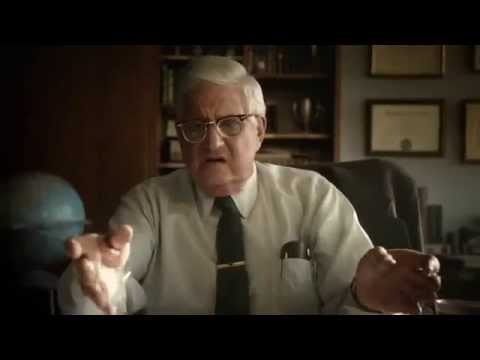

In [16]:
from IPython.display import YouTubeVideo

YouTubeVideo('iANv_0ZQKDY', width=700, height=500)